<a href="https://colab.research.google.com/github/cpython-projects/da_1709/blob/main/lesson_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Что такое распределение?

**Распределение** — это способ описать, как значения определённой переменной «раскиданы» в выборке. Оно показывает, с какой частотой встречаются разные значения.

Например, если у нас есть данные о возрасте студентов, можно построить гистограмму, чтобы увидеть распределение.

<Axes: >

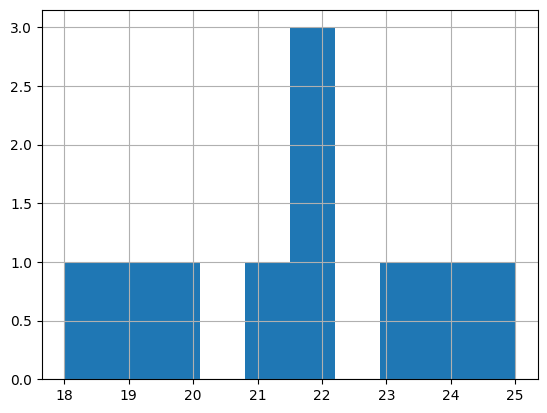

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ages = pd.Series([18, 19, 20, 21, 22, 22, 22, 23, 24, 25])
ages.hist(bins=10)

Распределение - это ответ на вопрос:
> Какие значения в столбце встречаются чаще, какие реже, и как они “распределены” вдоль числовой оси?


Распределение — это **структура данных**:

* есть ли перекос?
* есть ли редкие экстремальные значения?
* есть ли несколько групп?
* где находится “центр” данных?

От формы распределения зависит:

* какие метрики использовать,
* какие модели применять,
* какие тесты корректны,
* как чистить выбросы,
* как нормировать данные.

# 2. Какие бывают распределения?

## Модельные (теоретические)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Нормальное (колоколообразная кривая) — **Normal (bell-shaped curve)**

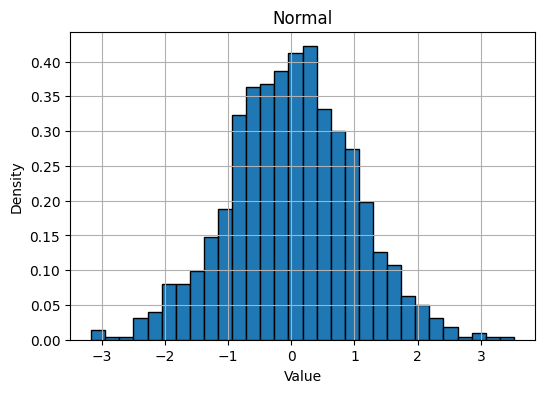

In [2]:
data = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** симметричная колоколообразная (bell curve).
* **Характеристики:** среднее = медиана = мода; большинство значений — около центра.
* **Где используется:** рост людей, IQ, погрешности измерений, природные процессы.
* **Базовый стандарт.** Часто используется как «эталон» для сравнения.

### Равномерное — **Uniform**

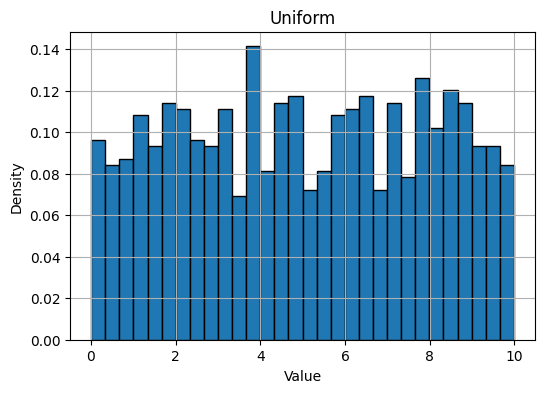

In [3]:
data = np.random.uniform(low=0, high=10, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Uniform")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** прямоугольник — все значения имеют одинаковую вероятность.
* **Характеристики:** нет преобладающих значений; полная «неопределённость».
* **Где используется:** генерация случайных чисел, первичные гипотезы, случайные события.
* **Самое простое распределение**, используется как базовое при симуляциях.

### Экспоненциальное — **Exponential**

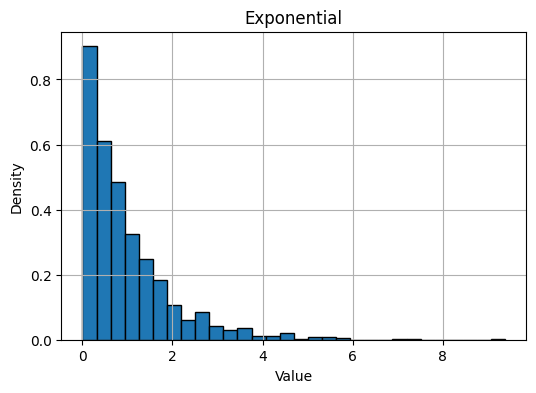

In [ ]:
data = np.random.exponential(scale=1.0, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Exponential")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** правосторонне скошенная (right-skewed), максимум в 0, далее быстро убывает.
* **Характеристики:** вероятность события уменьшается со временем.
* **Где используется:** время до наступления следующего события — например, время до поломки детали или между звонками.

### Логнормальное — **Log-normal**

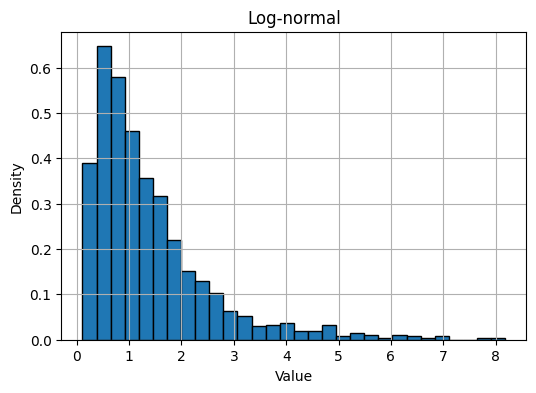

In [ ]:
data = np.random.lognormal(mean=0, sigma=0.8, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Log-normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** правосторонне скошенная, как «растянутое» нормальное распределение.
* **Характеристики:** логарифм значений имеет нормальное распределение.
* **Где используется:** время выполнения задач, доходы, размер файлов, длительность проектов.
* **Визуально похожа на экспоненциальное**, но максимум дальше от нуля.


**логарифм значений имеет нормальное распределение** - это ключевое свойство логнормального распределения:

> Если взять все значения, применить к ним логарифм, то полученные числа будут распределены **нормально** (как “колокол”).

То есть сами значения — НЕ нормальные,
но их логарифмы — нормальные.

---

### Почему так происходит?

Логарифм — это операция, которая “сжимает” большие значения и “растягивает” маленькие.

Например:

| Значение | Логарифм |
| -------- | -------- |
| 1        | 0        |
| 10       | 2.30     |
| 100      | 4.60     |
| 1000     | 6.90     |

Большой разброс превращается в аккуратный диапазон.

И если у исходных данных **огромный разброс**, но **множительные факторы** (умножения), то после логарифма они превращаются в “плюс-минус симметричные” данные → нормальное распределение.

---

### Почему логнормальное распределение встречается часто?

Потому что в жизни множество процессов устроены **мультипликативно**, а не аддитивно.

Примеры:

* доходы людей (растут в %)
* цены акций
* время исполнения (если одна задержка умножает срок)
* длины сессий в интернете
* просмотры, лайки, продажи
* размеры файлов

### Парето - **Pareto**

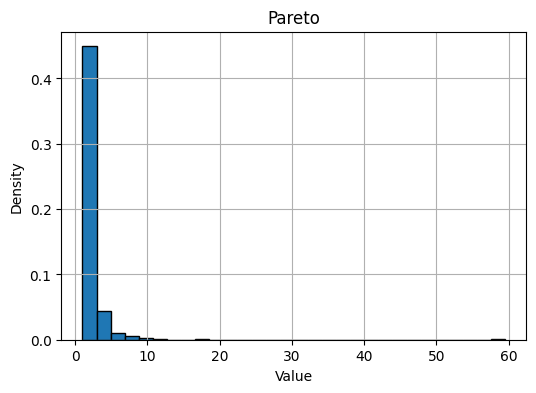

In [ ]:
# Генерация данных Парето
np.random.seed(42)
data = (np.random.pareto(a=2, size=1000) + 1) * 1  # сдвиг, чтобы min=1

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Pareto")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


* **Форма:** сильно скошенное вправо, “длинный хвост” — мало больших значений, много маленьких.
* **Характеристики:** 80/20 правило — большая часть эффекта (доходов, ресурсов, продаж) создаётся небольшой долей элементов.
* **Где используется:** моделирование доходов, богатства, размеров городов, размеров файлов, рисков крупных потерь.
* **Особенность:** распределение тяжелых хвостов, экстремальные значения встречаются гораздо чаще, чем в нормальном или равномерном.


### Правосторонне асимметричный или скошенный вправо — **Right-skewed**

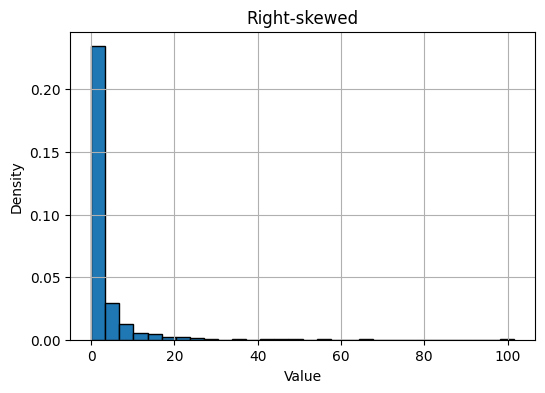

In [ ]:
data = np.random.lognormal(mean=0, sigma=1.5, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Right-skewed")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** любой распределение, у которого хвост справа длиннее.
* **Это не конкретное распределение**, а **свойство** формы.
* **К таким относятся:** экспоненциальное, логнормальное.
* **В реальном мире большинство "положительных" величин (продолжительность, доходы) именно такие.**

### Пуассоновский — **Poisson**


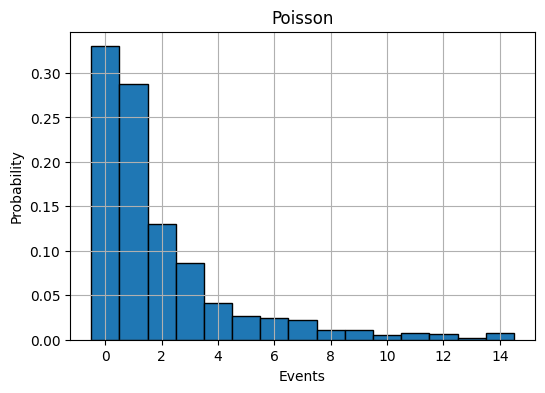

In [ ]:
ata = np.random.poisson(lam=3, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=np.arange(-0.5, 15.5, 1), density=True, edgecolor='black')
plt.title("Poisson")
plt.xlabel("Events")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

* **Форма:** дискретная, похожая на скошенное нормальное распределение.
* **Характеристики:** моделирует **количество событий** за фиксированный промежуток времени или пространства.
* **Где используется:** моделирует количество событий за фиксированный промежуток времени, когда события происходят независимо друг от друга: количество обращений в колл-центр за час; количество покупок в минуту (если поток “разреженный”); количество ДТП за день на участке дороги; количество посещений сайта в секунду (в low-traffic).

### Мультимодальный (то есть распределение с несколькими вершинами/пиками) — **Multimodal**

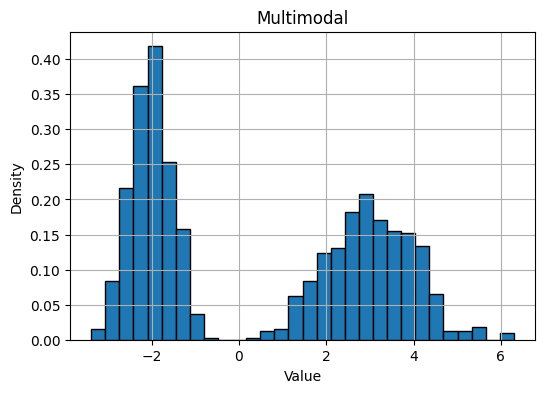

In [ ]:
data1 = np.random.normal(loc=-2, scale=0.5, size=500)
data2 = np.random.normal(loc=3, scale=1.0, size=500)
data = np.concatenate([data1, data2])

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Multimodal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


* **Форма:** имеет несколько пиков (мод) вместо одного.
* **Характеристики:** указывает на **смешанность групп в данных**.
* **Где используется:** распределение зарплат в компании с несколькими должностями

## Реальные (эмпирические)

### Зарплаты в IT — часто **смещены вправо** (длинный «хвост» с большими значениями)

👉 Основная масса зарплат — в пределах 1000–4000 $, но есть топ-менеджеры с 10k–20k+

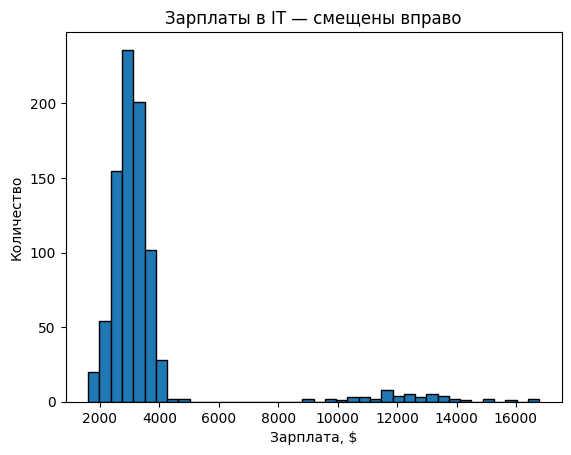

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Большинство зарплат — средние
middle = np.random.normal(3000, 500, 800)

# Топы — меньше по количеству, но значительно выше по величине
high = np.random.normal(12000, 2000, 50)

# Объединение и визуализация
salaries = np.concatenate([middle, high])

plt.hist(salaries, bins=40, edgecolor='black')
plt.title("Зарплаты в IT — смещены вправо")
plt.xlabel("Зарплата, $")
plt.ylabel("Количество")
plt.show()


**Что видим**:

* Основная масса слева
* Длинный «хвост» справа
* Среднее не отражает «типичную» зарплату → лучше смотреть на **медиану** или **Q1–Q3**


### Оценки студентов — часто **трапециевидные**

👉 Часто оценки «склеиваются» вверху: большинство студентов получают 4–5

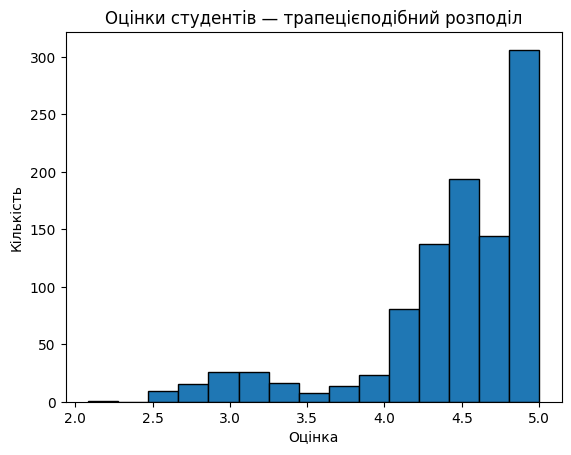

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grades = np.concatenate([
    np.random.normal(3, 0.3, 100),   # часть слабых студентов
    np.random.normal(4.5, 0.3, 700), # большинство
    np.random.normal(5, 0.1, 200)    # отличники
])

grades = np.clip(grades, 2, 5)  # ограничиваем по 5-балльной шкале

plt.hist(grades, bins=15, edgecolor='black')
plt.title("Оценки студентов — трапециевидное распределение")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.show()


**Что видим**:

* Данные сконцентрированы ближе к 4–5
* Может быть плато → **трапеция**
* В таких случаях среднее **почти не меняется**, но лучше смотреть на **Q1, Q3** или строить **boxplot**

### Количество покупок клиента — **разреженное**, часто **экспоненциальное** или **с нулевым модусом**


👉 Большинство клиентов покупают 0–1 раз, меньшинство — 10+

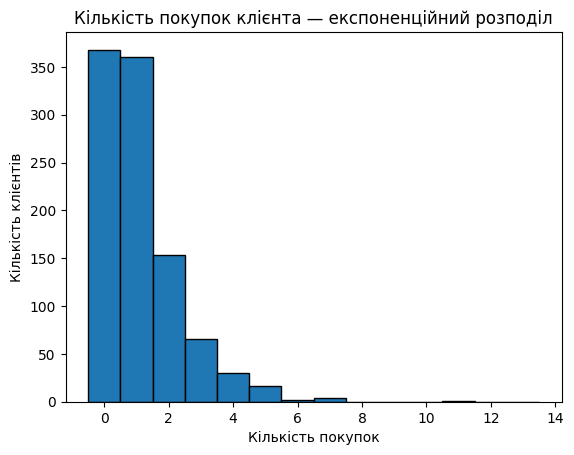

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

purchases = np.random.exponential(scale=1.2, size=1000)
purchases = np.round(purchases)

plt.hist(purchases, bins=range(0, 15), align='left', edgecolor='black')
plt.title("Количество покупок клиента — экспоненциальное распределение")
plt.xlabel("Количество покупок")
plt.ylabel("Количество клиентов")
plt.show()


**Что видим**:

* Очень много клиентов купили **0 или 1 раз**
* Хвост длинный, но **частота резко падает**
* Среднее не репрезентативно → лучше считать **конверсию**, **медиану** или **строить частоты по кластерам**


# 3. Зачем аналитику определять распределение данных по столбцу?

## **1. Выбор корректных статистических методов**

Разные распределения требуют разных подходов:

* **Нормальное распределение** → можно использовать среднее, стандартное отклонение, t-тесты, корреляции Пірсона.
* **Скошенное распределение** → среднее уже вводит в заблуждение → лучше использовать медиану, IQR, ранговые тесты, лог-трансформацию.
* **Мультимодальное** → указывает на наличие разных групп внутри данных → перед моделированием их нужно разделить.

**Если не знаешь распределение — можешь выбрать неверный метод и получить ложные выводы.**

---

## **2. Понимание природы и поведения данных**

Распределение показывает характер явления:

* Есть ли **пороговый эффект**?
* Есть ли **редкие, экстремальные события** (heavy tails)?
* Значения распределены равномерно или есть кластеры?

Например: продажи, время обработки заявок, доходы — почти всегда **право-скошенные**. Это нормальная логика бизнеса, и аналитик должен её понимать.

---

## **3. Выявление выбросов**

Выбросы могут быть:

* ошибками ввода (200 лет возраст клиента),
* естественными экстремальными значениями (VIP-клиенты),
* или маркерами аномалий для детектирования.

Но ты можешь увидеть выбросы **только** если понимаешь форму распределения.

---

## **4. Корректная визуализация**

---

# 4. Достаточно ли только визуализации для определения типа распределения?

**Нет, не всегда.**

**Визуализации достаточно в двух случаях:**

* явная нормальность/сильная скошенность/бимодальность видна глазами;
* распределение чистое и выборка велика.

**Визуализации НЕ достаточно, если:**

* мало данных - гистограмма будет обманывать;
* распределение смешанное (микс двух нормальных → часто выглядит как одна широкая);
* есть тяжелые "хвосты", незаметные на привычных масштабах;
* нужно формальное статистическое обоснование.


# 5. Что такое стандартное отклонение?

**Стандартное отклонение** — это **среднее расстояние** значений от среднего.

* Если значения «держатся кучей» вокруг среднего — отклонение маленькое.
* Если много значений сильно отличаются — большое.

---

**Формула**

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 }
$$

---

**Стандартное отклонение:**

* показывает **разброс** значений
* позволяет строить **доверительные интервалы** (диапазон, в котором с определённой вероятностью находится истинное среднее генеральной совокупности)
* критично для **нормального распределения**

⚠️ **Все это — только если данные примерно нормально распределены!**

---

**Когда на него смотреть:**

| Ситуация                                   | Стоит ли смотреть на std?    |
| ------------------------------------------ | ---------------------------- |
| Данные нормально распределены              | ✅ Да, полная сила std        |
| Данные примерно симметричные, без выбросов | ✅ Можно использовать         |
| Есть смещение или асимметрия               | ⚠️ Осторожно                 |
| Есть выбросы или «тяжёлый хвост»           | ❌ Среднее и std нерелевантны |

## Что означает ±1σ, ±2σ, ±3σ?

Это **интервалы вокруг среднего**, которые в нормальном распределении имеют особое значение:

| Интервал             | Сколько данных внутри (≈) |
| -------------------- | ------------------------- |
| **[μ − 1σ, μ + 1σ]** | ~68% значений             |
| **[μ − 2σ, μ + 2σ]** | ~95% значений             |
| **[μ − 3σ, μ + 3σ]** | ~99.7% значений           |

🔔 Работает **только для нормального распределения!**


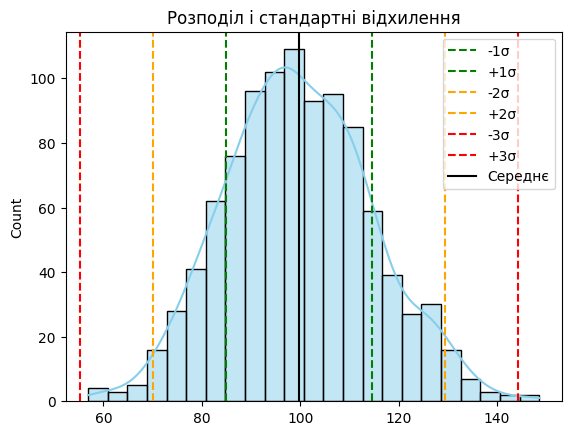

In [ ]:
data = np.random.normal(100, 15, 1000)

sns.histplot(data, kde=True, color='skyblue')
mean = np.mean(data)
std = np.std(data)

for i, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(mean - i*std, linestyle='--', color=color, label=f'-{i}σ')
    plt.axvline(mean + i*std, linestyle='--', color=color, label=f'+{i}σ')

plt.axvline(mean, color='black', label='Среднее')
plt.legend()
plt.title("Распределение и стандартные отклонения")
plt.show()

## **Коэффициент вариации (Coefficient of Variation, CV)** — это **относительная мера разброса данных**, которая показывает, насколько сильно варьируются значения относительно своего среднего.

Его часто называют *«нормализованным стандартным отклонением»*.

---

### **Формула**

$$
  CV = \frac{\sigma}{\bar{x}}
$$

* Обычно выражают в процентах:

$$
CV = \frac{\sigma}{\bar{x}} \cdot 100%
$$

---

### **Интерпретация**

Коэффициент вариации показывает:

> **какая доля среднего составляет стандартное отклонение.**

Пример:
Если CV = 0.25 → это значит, что разброс составляет 25% от среднего.

---

### **Когда CV полезен?**

**1. Сравнение разброса разных показателей**

Если два показателя имеют разные шкалы, их SD сравнивать нельзя, а CV — можно.

Пример:

* колебания цен на золото (в долларах)
* колебания курса валют (в процентах)
  CV позволяет сравнивать стабильность разных рынков.

**2. Анализ качества измерений**

Высокий CV → низкая стабильность.
Низкий CV → измерения точные и повторяемые.

**3. В анализе продаж, спроса, рисков**

* низкий CV → показатель стабилен;
* высокий CV → поведение непредсказуемо.

**4. В теории вероятностей и моделировании**

CV помогает понять, какое распределение лучше подходит:

* Для нормального CV обычно невысокий;
* Для экспоненциального CV ≈ 1;
* Для распределений с тяжёлыми хвостами CV может быть > 1.

---

### **Когда CV НЕ стоит использовать**

1. **Если среднее близко к нулю**
   CV начинает «взрываться» и становится бессмысленным.

2. **Если среднее отрицательное**
   CV теряет интерпретацию.

3. **Для распределений, где среднее плохо характеризует центр**
   Например, тяжёлые хвосты.

---

# 6. Что такое Z-score?

**Z-score (стандартное отклонение)** показывает, **на сколько σ (стандартных отклонений)** элемент отличается от среднего значения.

$$
Z = \frac{x - \mu}{\sigma}
$$

* $x$ — значение,
* $\mu$ — среднее значение (mean),
* $\sigma$ — стандартное отклонение (standard deviation)


## Как интерпретировать Z-score:

| Z-score      | Интерпретация                                                        |
| ------------ | -------------------------------------------------------------------- |
| ≈ 0          | Значение близко к среднему                                           |
| > 1 или < -1 | Далеко от среднего                                                   |
| > 2 или < -2 | Возможно — аномалия                                                  |
| > 3 или < -3 | Вероятная аномалия (в нормальном распределении таких значений <0.3%) |

## Пример в Python

In [8]:
from scipy.stats import zscore
import statistics
x = [10, 12, 14, 15, 16, 17, 200]
z = zscore(x)

print(statistics.mean(x))

for xi, zi in zip(x, z):
    print(f"x = {xi}, z = {zi:.2f}")


40.57142857142857
x = 10, z = -0.47
x = 12, z = -0.44
x = 14, z = -0.41
x = 15, z = -0.39
x = 16, z = -0.38
x = 17, z = -0.36
x = 200, z = 2.45


Те значения, где $|z| > 3$, — кандидаты на выбросы

## Когда **не стоит** использовать Z-score?

| Проблема                                    | Причина                                   |
| ------------------------------------------- | ----------------------------------------- |
| Данные имеют сильные выбросы                | Среднее и σ искажаются                    |
| Распределение сильно не нормальное          | Z-score теряет статистический смысл       |
| Данные категориальные или сильно дискретные | Z-score не подходит для нечисловых данных |

Альтернатива для нестандартных распределений — IQR


# 7. Квантили, квартили и межквартильный размах (IQR)

## **1. Квантили (quantiles)**

**Квантили** — это точки деления распределения на части с равной вероятностью.

> Проще: квантиль — это значение, ниже которого находится определённый процент данных.

### Примеры:

* 0.25-квантиль → 25% данных меньше или равно этому значению
* 0.5-квантиль → медиана (50% данных)
* 0.75-квантиль → 75% данных меньше или равно этому значению

### Важные квантили:

| Квантиль                | Что показывает       | Когда используется                        |
| ----------------------- | -------------------- | ----------------------------------------- |
| 0.5 (медиана)           | Центр распределения  | Когда данные скошены или есть выбросы     |
| 0.25 и 0.75             | Границы средних 50%  | Для IQR, оценки разброса и выбросов       |
| 0.1, 0.9 или 0.05, 0.95 | Хвосты               | Для оценки экстремальных значений, рисков |
| 0.01, 0.99              | Очень редкие события | Финансовый риск, аномалии                 |

### Python пример:

```python
import numpy as np

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

q25 = np.quantile(data, 0.25)  # 25% квантиль
q50 = np.quantile(data, 0.50)  # медиана
q75 = np.quantile(data, 0.75)  # 75% квантиль

print(q25, q50, q75)  # 3.25, 5.5, 7.75
```

**Замечание:** сортировать данные вручную **не нужно**, функции NumPy / Pandas делают это автоматически.

---

## **2. Квартили (quartiles)**

**Квартили** — это частный случай квантилей: данные делятся на **четверти**.

* **1-й квартиль (Q1)** = 25%-квантиль
* **2-й квартиль (Q2)** = 50%-квантиль = медиана
* **3-й квартиль (Q3)** = 75%-квантиль

То есть **квартиль = один из трёх делений данных на 4 равные части**.

> Название связано со словом **“квартал”** — четверть распределения.

**Смысл для аналитика:**

* Q1, Q2, Q3 показывают, где находятся **центральные части данных**
* Полезно для оценки **разброса**, выявления **выбросов** и построения **boxplot**

---

## **3. Межквартильный размах (IQR — Interquartile Range)**

**IQR = Q3 − Q1**

* Показывает диапазон, где находится **средние 50% данных**
* Устойчив к выбросам (в отличие от полного диапазона min-max)
* Используется для:

  * обнаружения выбросов
  * визуализации (boxplot)
  * оценки разброса без влияния экстремальных значений

### Python пример:

```python
iqr = q75 - q25
print("IQR:", iqr)  # 7.75 - 3.25 = 4.5
```

**Выбросы можно определить так:**

```python
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Выбросы:", outliers)
```

---

## Визуализация

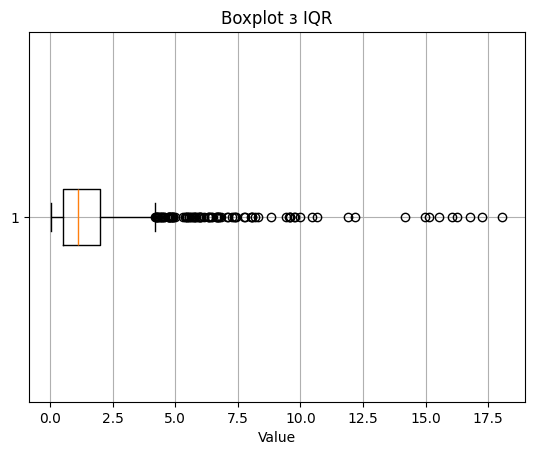

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.lognormal(mean=0, sigma=1.0, size=1000)

plt.boxplot(data, vert=False)
plt.title("Boxplot з IQR")
plt.xlabel("Value")
plt.grid(True)
plt.show()


Boxplot наглядно показывает:

* **Медиану** (средняя линия)
* **Q1, Q3** — края «коробки»
* **IQR** — ширина коробки
* **Усы** — границы без выбросов
* **Выбросы** — точки за пределами

## Почему IQR важен для аналитиков

| Причина                                             | Объяснение                                         |
| --------------------------------------------------- | -------------------------------------------------- |
| Устойчив к выбросам                                 | В отличие от дисперсии или стандартного отклонения |
| Даёт представление о «нормальном» диапазоне         | Средние 50% — самые типичные                       |
| Универсален — работает для любых форм распределения | Симметричных, скошенных и др.                      |

---

* **IQR** — один из ключевых показателей в **EDA (Exploratory Data Analysis)**
* Позволяет **оценить структуру данных**, независимо от того, нормальное распределение или нет

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/da_1305/refs/heads/main/real_estate_data.csv')
df.head()

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition
0,0,7312500.0,108.0,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.0,NaN,Kyiv,NaN
1,1,1884375.0,40.4,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.0,2.0,Brovary,81.0
2,2,2922750.0,56.0,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.3,0.0,Kyiv,558.0
3,3,36506250.0,159.0,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0
4,4,5625000.0,100.0,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.0,NaN,Kyiv,121.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23699 non-null  object 
 14  days_exposition       20518 non-null  float64
dtypes: bool(1), float64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.first_day_exposition.unique()

array(['2024-05-15', '2024-08-14', '2023-11-06', ..., '2021-08-26',
       '2022-08-14', '2022-09-19'], dtype=object)

In [14]:
df['first_day_exposition'] = pd.to_datetime(df.first_day_exposition, errors='coerce', format='%Y-%m-%d')

In [16]:
df.drop(columns='Unnamed: 0', inplace=True)

<Axes: >

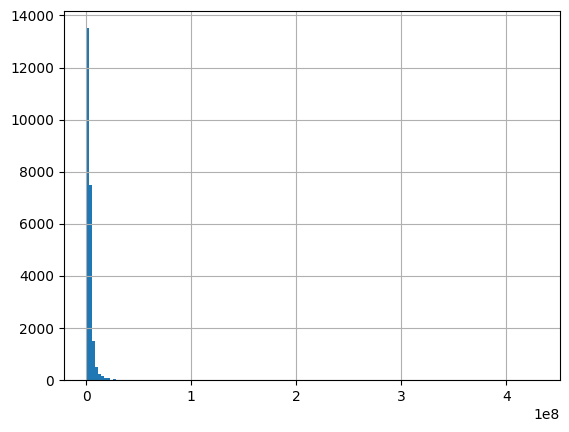

In [21]:
df.last_price.hist(bins=150)

In [24]:
df['price_1_sq_m'] = df.last_price / df.total_area

<Axes: >

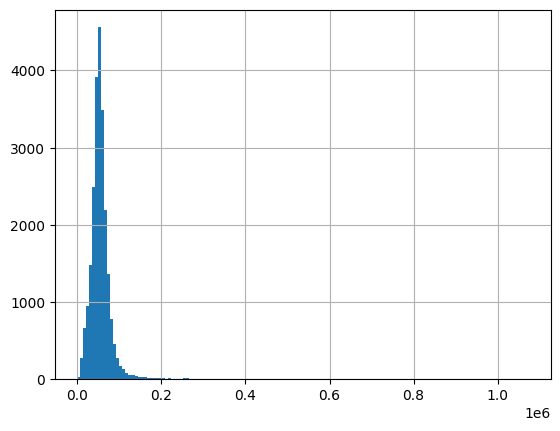

In [26]:
df.price_1_sq_m.hist(bins=150)

In [27]:
df.price_1_sq_m.mean()

np.float64(55924.681890603795)

In [28]:
df.price_1_sq_m.median()

53437.5

In [29]:
Q1 = df.price_1_sq_m.quantile(0.25)
Q3 = df.price_1_sq_m.quantile(0.75)

IQR = Q3 - Q1
print(Q1, Q3, IQR, sep='\n')

43079.32696011958
64269.1743757332
21189.84741561362


In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
df_filtered = df[(df.price_1_sq_m >= lower_bound) & (df.price_1_sq_m <= upper_bound)]

<Axes: >

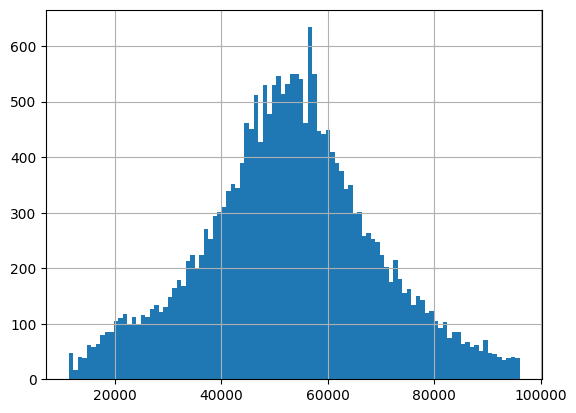

In [33]:
df_filtered.price_1_sq_m.hist(bins=100)

In [34]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [1]:
from ydata_profiling import ProfileReport

In [4]:
profiler = ProfileReport(df)

In [5]:
profiler.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 36.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from google.colab import files

files.download('report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>